In [39]:
!pip install scikit-learn
!pip install seaborn
!pip install catboost
!pip install pandas

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def load_dataset(filename):
    dataset = pd.read_csv(filename)
    column = list(dataset.column)
    price = column.pop(6)
    column.append(price)
    return dataset[column]

In [41]:
dataset = pd.read_csv("Red.csv")
dataset.head(10)

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014


In [42]:
dataset.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

In [43]:
dataset.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')

In [44]:
def clean_dataset(dataset):
    dataset = dataset.drop("Name", axis=1)
    dataset['Year'] = dataset['Year'].replace('N.V.', 2021)
    dataset['Year'] = dataset['Year'].astype('int')
    dataset.isnull().any()
    dataset.isnull().sum()/ dataset.shape[0]
    return dataset

In [45]:
dataset = clean_dataset(dataset)
dataset.tail()

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
8661,United States,Lodi,Michael David Winery,3.8,994,16.47,2016
8662,Italy,Maremma Toscana,Le Mortelle,4.0,995,20.09,2016
8663,France,Haut-Médoc,Château Cambon La Pelouse,3.7,996,23.95,2010
8664,Australia,South Eastern Australia,Yellow Tail,3.5,998,6.21,2019
8665,Argentina,Tunuyán,Salentein,3.4,999,7.88,2016


In [46]:
def print_hist(data):
    plt.figure(figsize=(10,10))
    sns.barplot(x="Country",
                y="Rating",
                data=data)  # dataset o'rniga vino_df yozilishi kerak
    plt.xticks(rotation=45)
    plt.show()

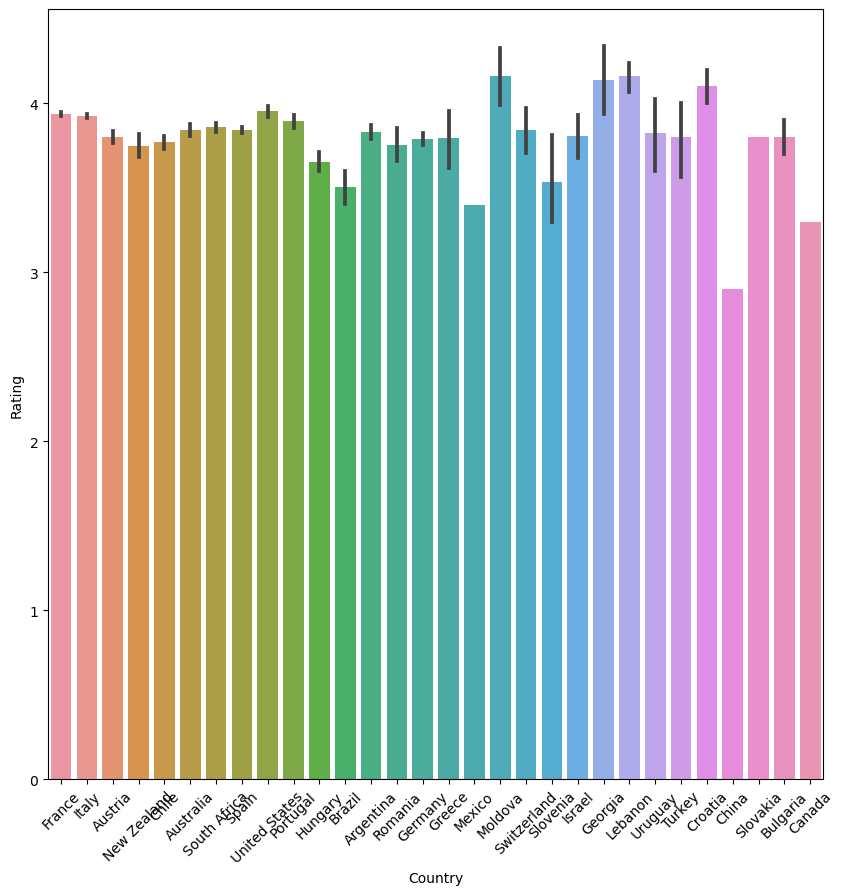

In [47]:
print_hist(dataset)

In [48]:
def pie(data):
    df_country = data.groupby(data['Country'])['Country'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    df_country.plot.pie(autopct='%1.f%%',
                                                                 wedgeprops={'linewidth':2,'edgecolor':'white'},
                                                                 shadow=True,
                                                                 fontsize=20)
    plt.title("Wise Distribution of Country %")
    plt.subplot(122)
    df_country.plot(marker='o',markersize=10,color='red')
    df_country.plot(kind='bar',color='blue')
    plt.title("Distribution of Country");
    plt.show()

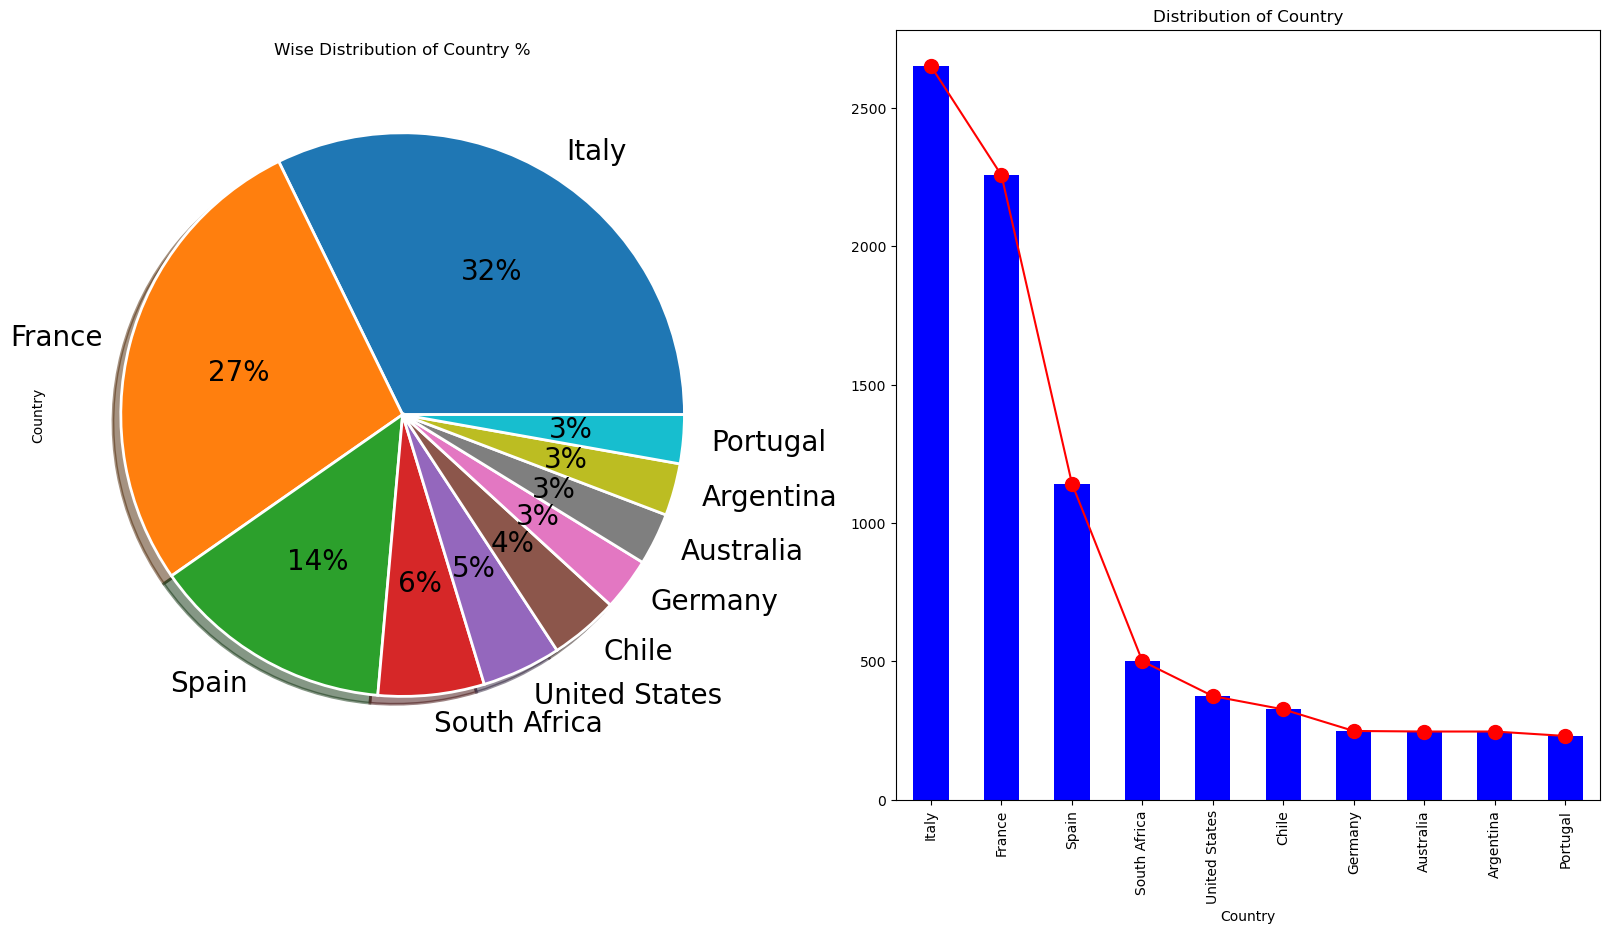

In [49]:
pie(dataset)

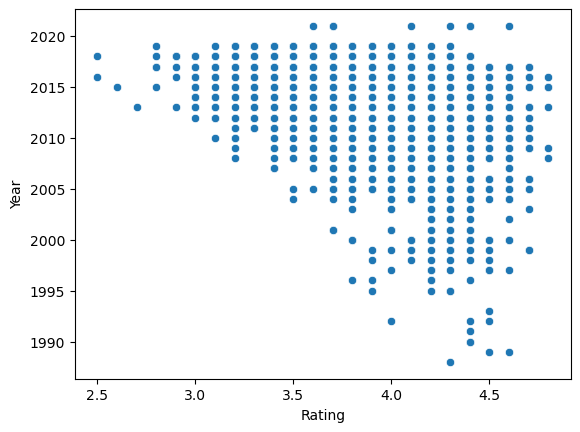

In [51]:
def dataset_rating_years(dataset):
    sns.scatterplot(x='Rating', y='Year', data=dataset)
    plt.show()


dataset_rating_years(dataset)


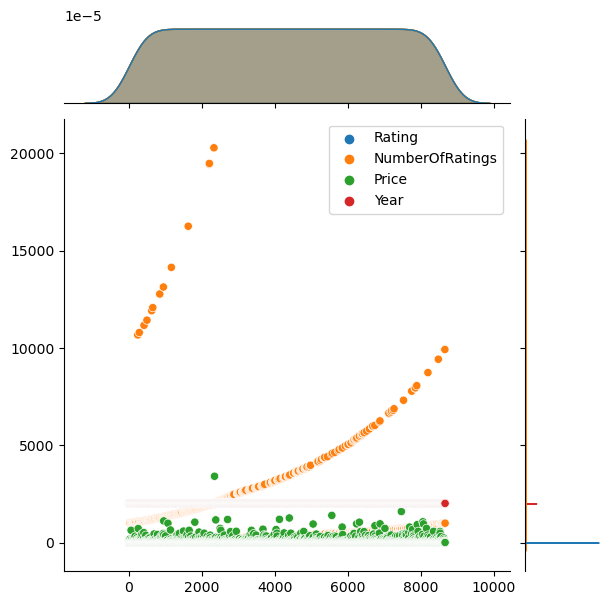

In [54]:
sns.jointplot(data=dataset)
plt.show()

In [55]:
def encoder(dataset):
    encoder = LabelEncoder()
    columns = list(dataset.columns) 
    
    for column in columns:        
        if dataset[column].dtype != int:
            print(f"{column} column is encoding")
            new_column = encoder.fit(dataset[column])
            dataset[column] = new_column.transform(dataset[column])
    return dataset

In [56]:
dataset = encoder(dataset.copy())

Country column is encoding
Region column is encoding
Winery column is encoding
Rating column is encoding
NumberOfRatings column is encoding
Price column is encoding


In [57]:
dataset.head()

,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,9,408,649,17,75,2109,2011
1,9,286,744,18,75,684,2017
2,15,542,2172,14,75,184,2015
3,15,41,439,10,75,274,2019
4,2,104,1794,14,75,1246,2016


<Figure size 2000x1000 with 0 Axes>

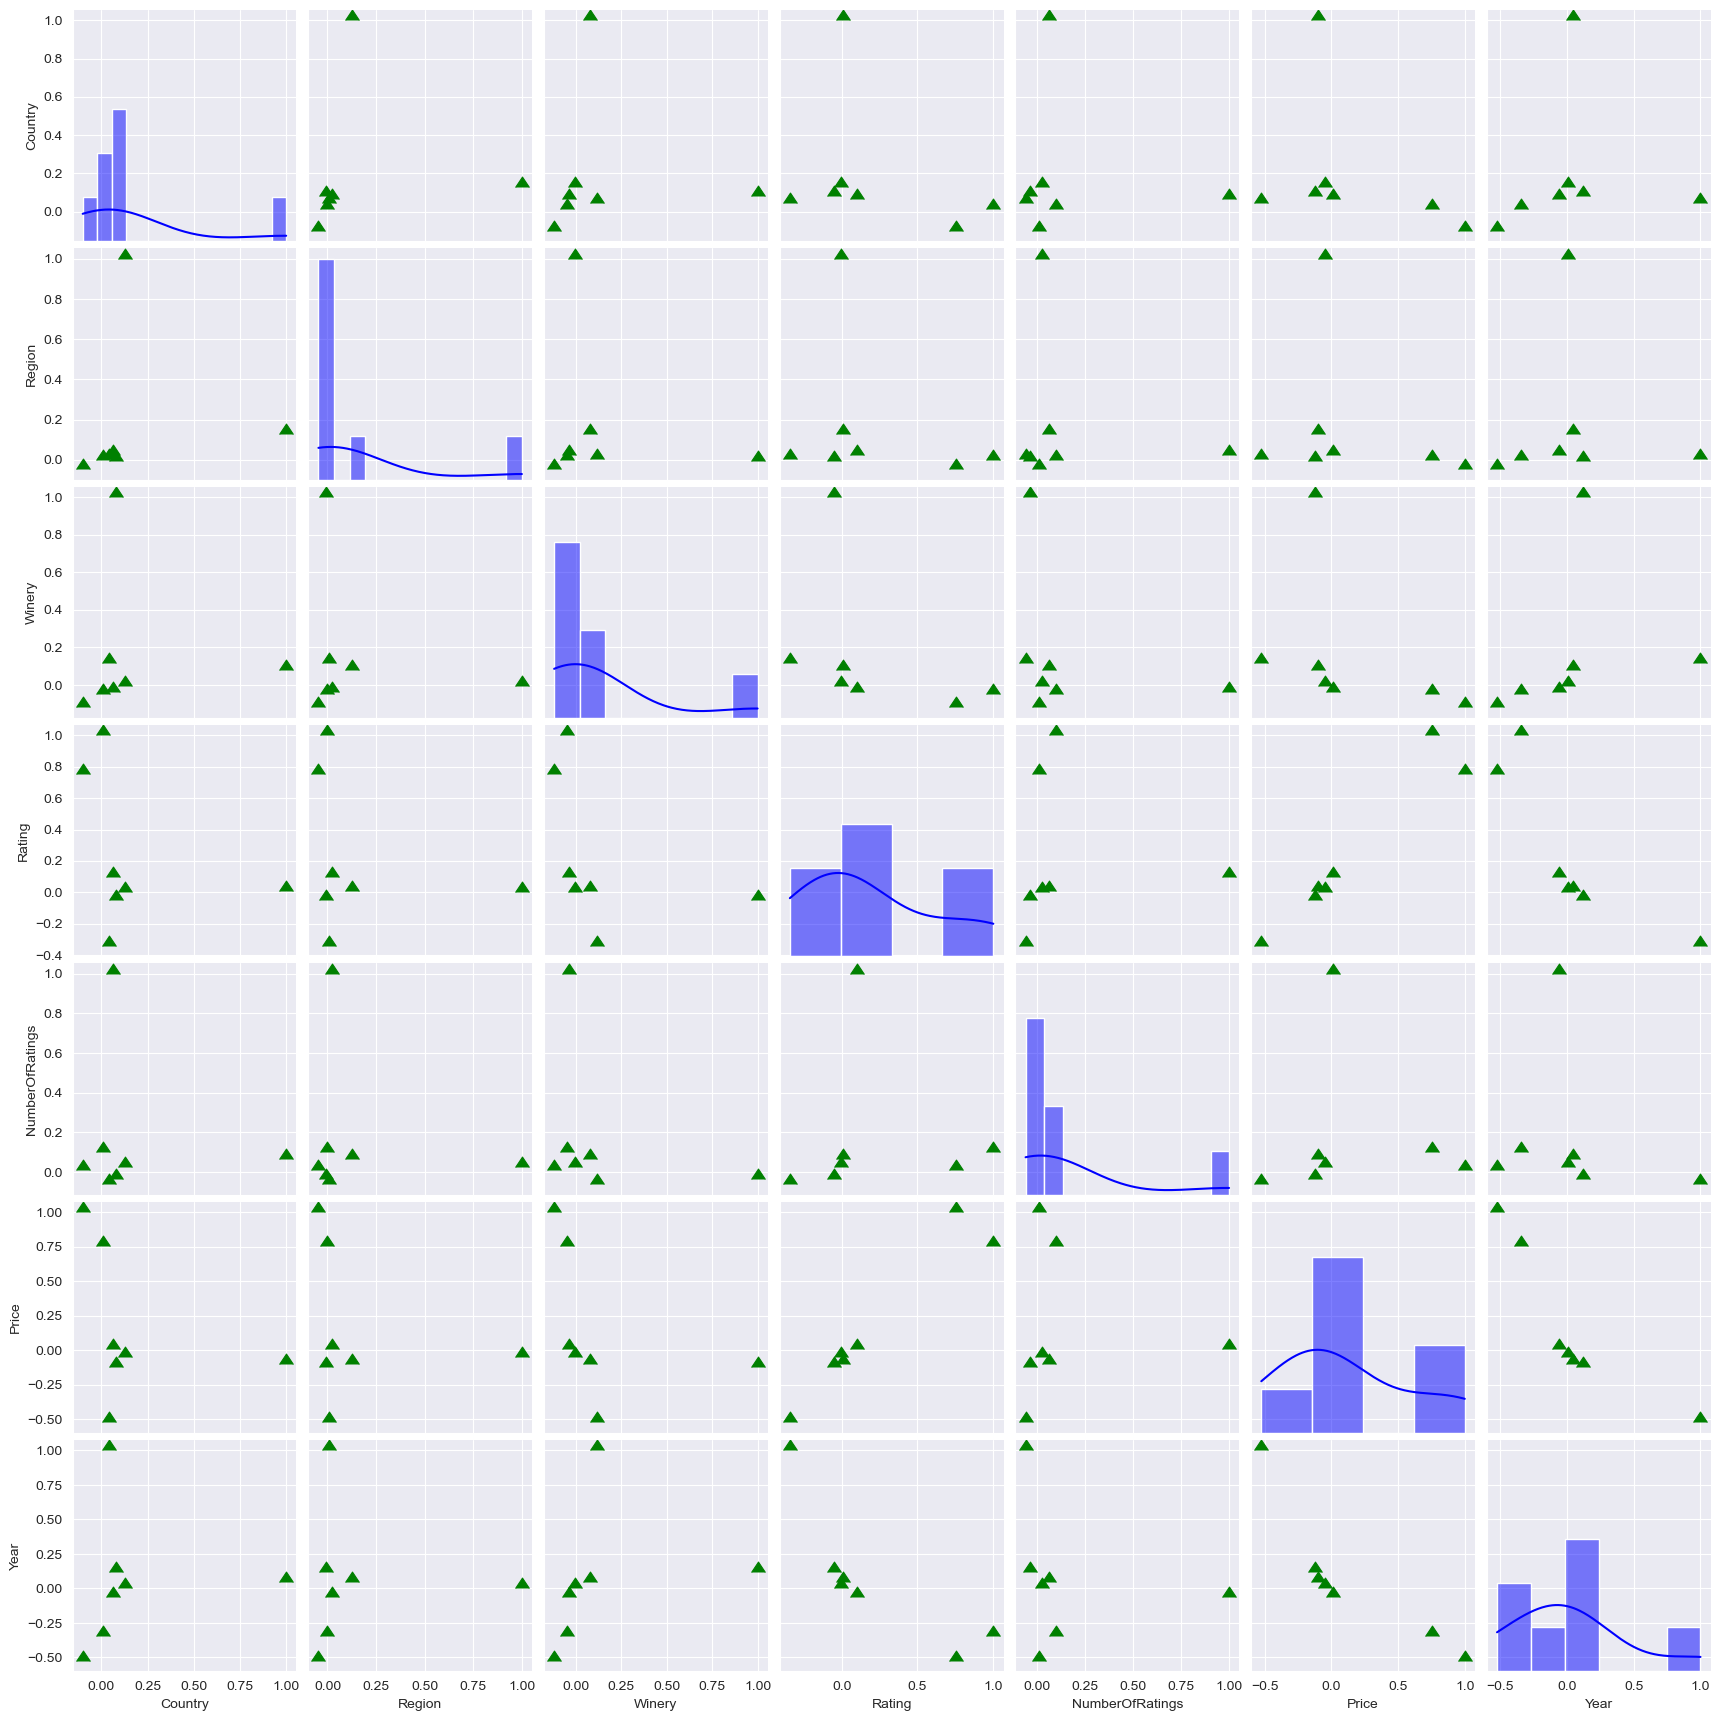

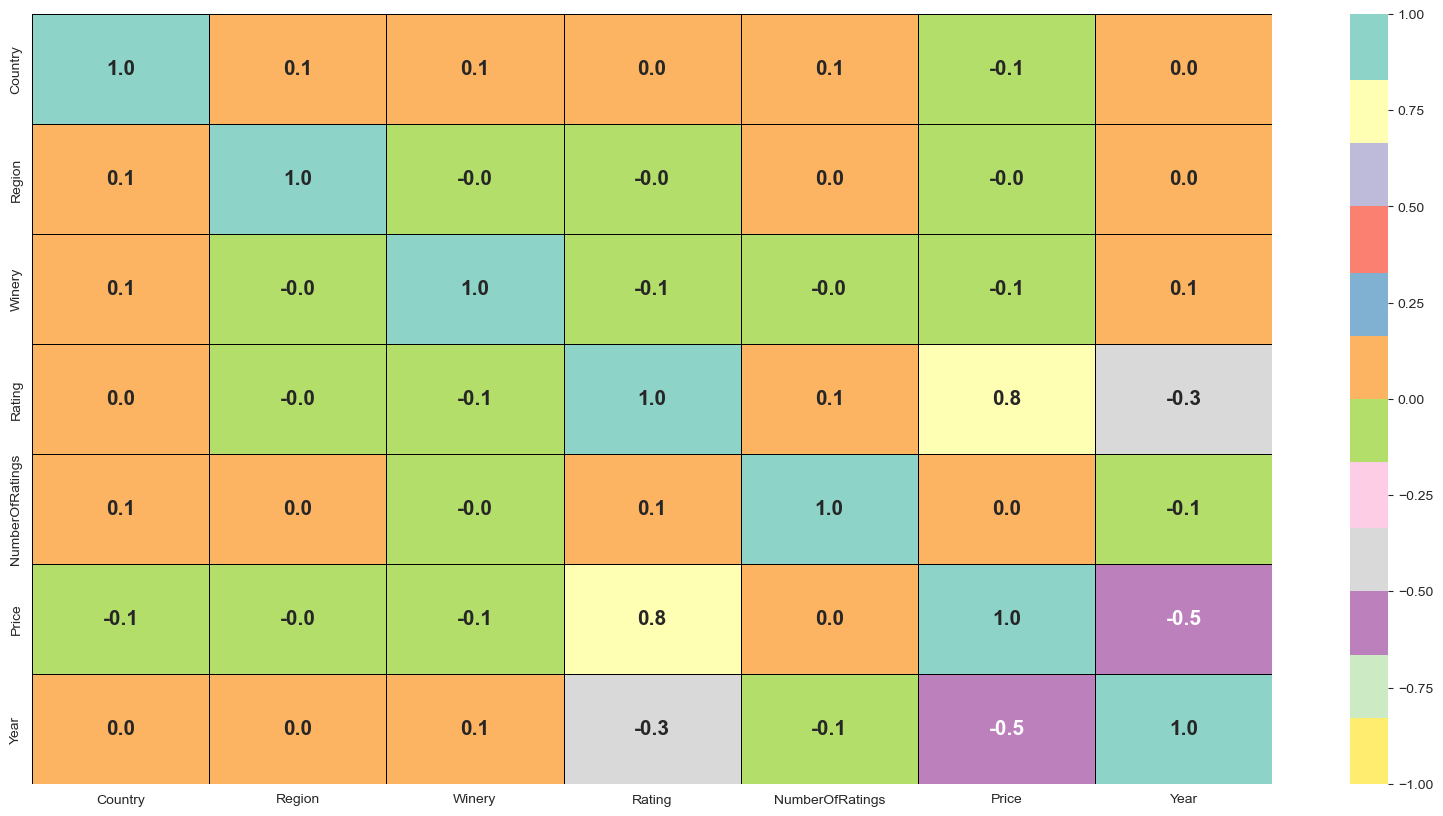

In [58]:
def correlation(dataset):
    sns.set_style('darkgrid')
    correlations  = dataset.corr()
    plt.figure(figsize=(20,10))
    sns.pairplot(data=correlations, diag_kws=dict(color='blue', kde=TabError), plot_kws=dict(color='green', marker=10, s=100))
    plt.show()
    plt.figure(figsize=(20,10))
    sns.heatmap(correlations, vmin=-1, vmax=1, center=0, cmap='Set3_r', annot=True, fmt='.1f', annot_kws=dict(size=15, weight='bold'), linecolor='black', linewidth=.5)
    plt.show()

correlation(dataset)

In [59]:
def machine(param):
    x = param.drop( 'Price', axis=1)
    y = param.Price
    x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=50)
    madel_1_1  = CatBoostRegressor().fit(x_train, y_train)
    madel_2_1  = GradientBoostingRegressor().fit(x_train, y_train)
    madels = [madel_1_1, madel_2_1 ]
    rmse_test =[] 
    r2_test =[]   

    for madel in madels:
        predict = madel.predict(x_test)
        rmse_test.append( round( np.sqrt( mean_squared_error(y_test, predict) ), 2 ) )
        r2_test.append( round(r2_score(y_test, predict)*100 , 1 ) )

     
        madel_name = "CatBoostRegressor GradientBoostingRegressor".split()
        result = pd.DataFrame({'RMSE':rmse_test,'R2_Test':r2_test}, index = madel_name)
    return result

In [60]:
machine(dataset)

Learning rate set to 0.055595
0:	learn: 639.5460541	total: 199ms	remaining: 3m 18s
1:	learn: 619.2761868	total: 205ms	remaining: 1m 42s
2:	learn: 599.0861341	total: 210ms	remaining: 1m 9s
3:	learn: 580.2823724	total: 215ms	remaining: 53.5s
4:	learn: 563.3390260	total: 221ms	remaining: 44s
5:	learn: 546.4103756	total: 226ms	remaining: 37.5s
6:	learn: 530.6454258	total: 232ms	remaining: 32.9s
7:	learn: 516.0786022	total: 236ms	remaining: 29.3s
8:	learn: 502.5347175	total: 242ms	remaining: 26.6s
9:	learn: 490.7405189	total: 247ms	remaining: 24.5s
10:	learn: 479.0664241	total: 253ms	remaining: 22.7s
11:	learn: 467.7315794	total: 258ms	remaining: 21.2s
12:	learn: 458.1721418	total: 263ms	remaining: 20s
13:	learn: 448.3953445	total: 269ms	remaining: 18.9s
14:	learn: 439.6144453	total: 274ms	remaining: 18s
15:	learn: 431.8350126	total: 279ms	remaining: 17.1s
16:	learn: 424.9249537	total: 284ms	remaining: 16.4s
17:	learn: 418.2596559	total: 288ms	remaining: 15.7s
18:	learn: 411.6469718	total: 

189:	learn: 297.4064353	total: 1.18s	remaining: 5.02s
190:	learn: 297.2709870	total: 1.18s	remaining: 5.02s
191:	learn: 297.1069309	total: 1.19s	remaining: 5s
192:	learn: 296.9329430	total: 1.19s	remaining: 5s
193:	learn: 296.7684860	total: 1.2s	remaining: 4.98s
194:	learn: 296.6947436	total: 1.2s	remaining: 4.97s
195:	learn: 296.5112111	total: 1.21s	remaining: 4.96s
196:	learn: 296.3835383	total: 1.21s	remaining: 4.94s
197:	learn: 296.2228335	total: 1.22s	remaining: 4.93s
198:	learn: 296.0402194	total: 1.22s	remaining: 4.92s
199:	learn: 295.8663770	total: 1.23s	remaining: 4.91s
200:	learn: 295.7264298	total: 1.23s	remaining: 4.89s
201:	learn: 295.5860625	total: 1.24s	remaining: 4.89s
202:	learn: 295.4598933	total: 1.24s	remaining: 4.88s
203:	learn: 295.2558603	total: 1.25s	remaining: 4.86s
204:	learn: 295.0066163	total: 1.25s	remaining: 4.86s
205:	learn: 294.7668860	total: 1.26s	remaining: 4.84s
206:	learn: 294.6233118	total: 1.26s	remaining: 4.83s
207:	learn: 294.4973026	total: 1.27s

352:	learn: 276.8633160	total: 2s	remaining: 3.67s
353:	learn: 276.7812474	total: 2.01s	remaining: 3.67s
354:	learn: 276.7124236	total: 2.01s	remaining: 3.66s
355:	learn: 276.6171395	total: 2.02s	remaining: 3.65s
356:	learn: 276.4979561	total: 2.02s	remaining: 3.64s
357:	learn: 276.4493571	total: 2.03s	remaining: 3.63s
358:	learn: 276.4048241	total: 2.03s	remaining: 3.63s
359:	learn: 276.3008017	total: 2.04s	remaining: 3.62s
360:	learn: 276.1936341	total: 2.04s	remaining: 3.62s
361:	learn: 276.0774968	total: 2.05s	remaining: 3.61s
362:	learn: 275.9554519	total: 2.05s	remaining: 3.6s
363:	learn: 275.8348359	total: 2.06s	remaining: 3.59s
364:	learn: 275.7192125	total: 2.06s	remaining: 3.59s
365:	learn: 275.5716522	total: 2.07s	remaining: 3.58s
366:	learn: 275.4883402	total: 2.07s	remaining: 3.57s
367:	learn: 275.4465068	total: 2.08s	remaining: 3.57s
368:	learn: 275.3345265	total: 2.08s	remaining: 3.56s
369:	learn: 275.2412856	total: 2.09s	remaining: 3.55s
370:	learn: 275.1136628	total: 2

505:	learn: 262.9692287	total: 2.79s	remaining: 2.72s
506:	learn: 262.8899376	total: 2.79s	remaining: 2.72s
507:	learn: 262.8383914	total: 2.8s	remaining: 2.71s
508:	learn: 262.7148389	total: 2.8s	remaining: 2.7s
509:	learn: 262.5954960	total: 2.81s	remaining: 2.7s
510:	learn: 262.5147601	total: 2.81s	remaining: 2.69s
511:	learn: 262.3971929	total: 2.82s	remaining: 2.69s
512:	learn: 262.3594159	total: 2.82s	remaining: 2.68s
513:	learn: 262.2730994	total: 2.83s	remaining: 2.67s
514:	learn: 262.2042677	total: 2.83s	remaining: 2.67s
515:	learn: 262.0946605	total: 2.83s	remaining: 2.66s
516:	learn: 261.9697877	total: 2.84s	remaining: 2.65s
517:	learn: 261.8934758	total: 2.85s	remaining: 2.65s
518:	learn: 261.8617670	total: 2.85s	remaining: 2.64s
519:	learn: 261.7442151	total: 2.85s	remaining: 2.64s
520:	learn: 261.7232582	total: 2.86s	remaining: 2.63s
521:	learn: 261.6730039	total: 2.87s	remaining: 2.62s
522:	learn: 261.6204076	total: 2.87s	remaining: 2.62s
523:	learn: 261.4978935	total: 2

662:	learn: 251.6248832	total: 3.58s	remaining: 1.82s
663:	learn: 251.5502605	total: 3.59s	remaining: 1.81s
664:	learn: 251.4716010	total: 3.59s	remaining: 1.81s
665:	learn: 251.3621883	total: 3.6s	remaining: 1.8s
666:	learn: 251.2916864	total: 3.6s	remaining: 1.8s
667:	learn: 251.2193406	total: 3.61s	remaining: 1.79s
668:	learn: 251.1753339	total: 3.61s	remaining: 1.79s
669:	learn: 251.0805949	total: 3.62s	remaining: 1.78s
670:	learn: 250.9749963	total: 3.62s	remaining: 1.78s
671:	learn: 250.9253143	total: 3.63s	remaining: 1.77s
672:	learn: 250.8301472	total: 3.63s	remaining: 1.76s
673:	learn: 250.7724715	total: 3.64s	remaining: 1.76s
674:	learn: 250.7022043	total: 3.64s	remaining: 1.75s
675:	learn: 250.6340908	total: 3.65s	remaining: 1.75s
676:	learn: 250.5687005	total: 3.65s	remaining: 1.74s
677:	learn: 250.5182765	total: 3.66s	remaining: 1.74s
678:	learn: 250.4907238	total: 3.66s	remaining: 1.73s
679:	learn: 250.4284842	total: 3.67s	remaining: 1.73s
680:	learn: 250.3530196	total: 3

829:	learn: 241.3723873	total: 4.43s	remaining: 908ms
830:	learn: 241.3402432	total: 4.44s	remaining: 903ms
831:	learn: 241.2580545	total: 4.44s	remaining: 897ms
832:	learn: 241.2072775	total: 4.45s	remaining: 892ms
833:	learn: 241.1497546	total: 4.45s	remaining: 887ms
834:	learn: 241.0995497	total: 4.46s	remaining: 881ms
835:	learn: 241.0214077	total: 4.46s	remaining: 876ms
836:	learn: 240.9555317	total: 4.47s	remaining: 870ms
837:	learn: 240.9122999	total: 4.47s	remaining: 865ms
838:	learn: 240.8300195	total: 4.48s	remaining: 860ms
839:	learn: 240.8006435	total: 4.48s	remaining: 854ms
840:	learn: 240.7527314	total: 4.49s	remaining: 849ms
841:	learn: 240.6694185	total: 4.5s	remaining: 844ms
842:	learn: 240.6048481	total: 4.5s	remaining: 838ms
843:	learn: 240.5452052	total: 4.5s	remaining: 833ms
844:	learn: 240.5102422	total: 4.51s	remaining: 827ms
845:	learn: 240.4773333	total: 4.51s	remaining: 822ms
846:	learn: 240.4401316	total: 4.52s	remaining: 817ms
847:	learn: 240.3876418	total: 

989:	learn: 233.0595934	total: 5.25s	remaining: 53ms
990:	learn: 233.0166747	total: 5.25s	remaining: 47.7ms
991:	learn: 232.9705587	total: 5.26s	remaining: 42.4ms
992:	learn: 232.9285022	total: 5.26s	remaining: 37.1ms
993:	learn: 232.8701271	total: 5.27s	remaining: 31.8ms
994:	learn: 232.8466389	total: 5.27s	remaining: 26.5ms
995:	learn: 232.7704441	total: 5.28s	remaining: 21.2ms
996:	learn: 232.7116416	total: 5.28s	remaining: 15.9ms
997:	learn: 232.6327012	total: 5.29s	remaining: 10.6ms
998:	learn: 232.5811623	total: 5.29s	remaining: 5.3ms
999:	learn: 232.5463767	total: 5.3s	remaining: 0us


,RMSE,R2_Test
CatBoostRegressor,279.99,82.9
GradientBoostingRegressor,308.58,79.2
